In [17]:
#The following citation is requested by Scikit learn for use of its product:
"""
@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}
"""
"""
In addition, the following videos were used to create and train the model, sources can be found in the README file:
Credit to Nolan R. (n.d.) for one-hot encoding used to split features.
Credit to Smith B. for his work in training and evaluating models. 
"""

'\nIn addition, the following videos were used to create and train the model, sources can be found in the README file:\nCredit to Nolan R. (n.d.) for one-hot encoding used to split features.\nCredit to Smith B. for his work in training and evaluating models. \n'

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [19]:
heart = pd.read_csv("heart_risk_cleaned.csv")
heart = heart.drop(columns=["Patient ID"])
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(heart[['Cholesterol', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides']])

ohetransform


,Cholesterol_0,Cholesterol_1,Cholesterol_2,Heart Rate_0,Heart Rate_1,Heart Rate_2,Diet_0,Diet_1,Diet_2,Income_0,...,Income_3,Income_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4,Triglycerides_0,Triglycerides_1,Triglycerides_2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8759,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8760,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8761,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
heart = pd.concat([heart, ohetransform], axis=1).drop(columns=['Cholesterol', 'Heart Rate', 'Diet', 'Income', 'BMI', 'Triglycerides'])
heart.insert(34, "Heart Attack Risk", heart.pop("Heart Attack Risk"))
heart.head()

,Age,Sex,Hypertension,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Stress Level,...,Income_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4,Triglycerides_0,Triglycerides_1,Triglycerides_2,Heart Attack Risk
0,1,1,1,0,0,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0,1,1,1,1,1,1,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0,0,1,1,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,1,1,0,1,1,1,0,1,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [21]:
LRclass = LogisticRegression()

In [22]:
# Split into features (predictors) and target/label
#using PANDAS

heart_feat = heart.iloc[:, 0:34] #split into features, the things we want to input

heart_targ = heart.iloc[:, 34] # split into target, this is the thing we are looking to check given all inputs

In [23]:
#train test split
heartTrainX, heartTestX, heartTrainY, heartTestY = train_test_split(heart_feat, heart_targ, test_size=0.4)

#fit training data. Train models on training data


LRclass.fit(heartTrainX, heartTrainY)

# Carry out predictions on test dataset


LRpredHeart = LRclass.predict(heartTestX)

# Error metrics using roc_auc score
print("LR classifier roc_auc score:" ,roc_auc_score(heartTestY, LRpredHeart))

# Error Metrics using accuracy score


print("LR classifier accuracy score:" ,accuracy_score(heartTestY, LRpredHeart))

# Error Metrics using Mean Square Error

print("LR MSE:" ,mean_squared_error(heartTestY, LRpredHeart))

LR classifier roc_auc score: 0.5
LR classifier accuracy score: 0.630062749572162
LR MSE: 0.369937250427838


In [24]:
#K-Fold Cross validation
print("MSE of LR model using k-fold CV:", -cross_val_score(LRclass, heart_feat, heart_targ.ravel(), cv=5, scoring="neg_mean_squared_error").mean())


MSE of LR model using k-fold CV: 0.3582106473703267


In [25]:
#Evaluation of models
LRTT = []
for i in range(10):
        #train test split
    heartTrainX, heartTestX, heartTrainY, heartTestY = train_test_split(heart_feat, heart_targ, test_size=0.4)

    #fit training data. Train models on training data
    LRclass.fit(heartTrainX, heartTrainY)
    
    # Carry out predictions on test dataset
    LRpredHeart = LRclass.predict(heartTestX)
    
    LRTT.append(mean_squared_error(LRpredHeart, heartTestY))



0.36965202509982886
0.34455219623502564
0.3622361665715916
0.35482030804335424
0.3642327438676555
0.3582430119794638
0.3482601254991443
0.3605248146035368
0.35567598402738165
0.3616657159155733


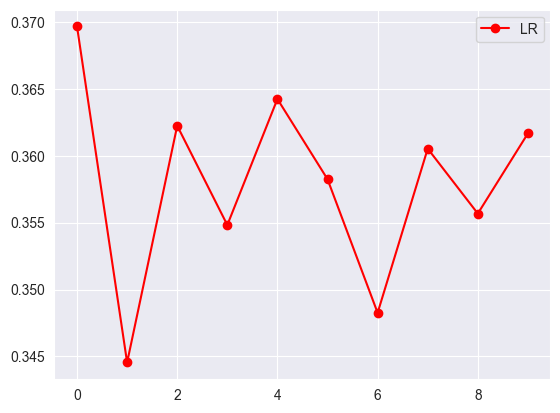

In [26]:
plt.plot(LRTT, "-ro", label= "LR")
plt.legend(loc= "best")
for mean in LRTT:
    print(mean)

In [27]:
#Tune LR model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

#create the grid of hyperparameters to be used in RandomizedSearchCV
random_grid_LR = {'penalty' : ['l2', None], 'solver' : ['sag', 'saga', 'liblinear']}
#Create the randomizedSearchCV object
LR_random = RandomizedSearchCV(estimator=LRclass, param_distributions=random_grid_LR, n_iter=30, cv=5, verbose=0, n_jobs=-1, scoring="neg_mean_squared_error")

LR_random.fit(heart_feat, heart_targ)

C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'penalty': ['l2', None],
                                        'solver': ['sag', 'saga', 'liblinear']},
                   scoring='neg_mean_squared_error')

In [28]:
LR_random.fit(heart_feat, heart_targ)

C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'penalty': ['l2', None],
                                        'solver': ['sag', 'saga', 'liblinear']},
                   scoring='neg_mean_squared_error')

In [29]:
LR_random.best_params_

{'solver': 'sag', 'penalty': 'l2'}

In [30]:
# Run LR Model with optimized hyperparameters
random = []
for i in range(20):
    
    random.append(-cross_val_score(LogisticRegression(solver='sag', penalty='l2'), X=heart_feat, y=heart_targ, cv=5, scoring="neg_mean_squared_error").mean())


0.6383342840844267


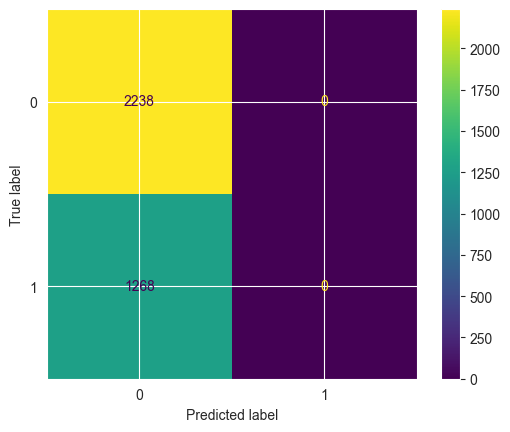

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
LRclass.fit(heartTrainX, heartTrainY)

predictions = LRclass.predict(heartTestX)
cm = confusion_matrix(heartTestY, predictions, labels=LRclass.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LRclass.classes_)
disp.plot()

print(accuracy_score(heartTestY, predictions))


In [32]:
LRclass.coef_

array([[ 0.02779368, -0.01714712,  0.01575989,  0.07935448, -0.0436051 ,
        -0.01245526, -0.0645013 , -0.04660268,  0.00678768, -0.00593803,
         0.0179997 , -0.05372284, -0.0671909 , -0.00795012,  0.07427266,
        -0.03049815, -0.04468768,  0.07431746, -0.02186338, -0.04227334,
         0.06326835, -0.18567189,  0.07154956,  0.0559137 , -0.01070359,
         0.06804385, -0.19660639,  0.12975496, -0.03547025,  0.04623118,
         0.05522214,  0.02587091, -0.00174374, -0.02499553]])

In [33]:
#Shubham Singh YouTube: 11.21 Finding the Most Important Features
feature_dict = dict(zip(heart.columns, list(LRclass.coef_[0])))
feature_dict
#TODO need to find best coefficients, narrow them down to top 10, then retry confusion matrix and MSE with new features selected
#TODO use coefficients as part of storytelling
#TODO add new citations and update github if necessary

{'Age': 0.027793676823110486,
 'Sex': -0.017147119515443867,
 'Hypertension': 0.01575988541598682,
 'Diabetes': 0.07935447770144276,
 'Family History': -0.043605097688907836,
 'Smoking': -0.012455261385913815,
 'Alcohol Consumption': -0.06450129849935496,
 'Exercise Hours Per Week': -0.04660268481264803,
 'Previous Heart Problems': 0.006787680979080275,
 'Stress Level': -0.0059380309869098095,
 'Physical Activity Days Per Week': 0.01799969535883031,
 'Sleep Hours Per Day': -0.053722837821378405,
 'Cholesterol_0': -0.06719090489869187,
 'Cholesterol_1': -0.007950119591363934,
 'Cholesterol_2': 0.07427266006868823,
 'Heart Rate_0': -0.03049814980887701,
 'Heart Rate_1': -0.04468767797028539,
 'Heart Rate_2': 0.07431746335775789,
 'Diet_0': -0.021863378839138782,
 'Diet_1': -0.04227333841279446,
 'Diet_2': 0.06326835283055232,
 'Income_0': -0.1856718859637407,
 'Income_1': 0.07154956418639544,
 'Income_2': 0.055913701216838314,
 'Income_3': -0.010703590071757162,
 'Income_4': 0.0680438462

In [34]:
top_feature_list = [] # feature with coef in tuple form
for feature in list(feature_dict.keys()):
    
    feature_coef = feature_dict[feature]
    
    if feature_coef < 0: # flip the sign for processing by greatest absolute effect
        feature_coef = feature_coef * -1
         
    if len(top_feature_list) < 10: # if list not yet full always append
          
            top_feature_list.append((feature, feature_coef))
        
    if len(top_feature_list) >= 10:
        
        for item in top_feature_list:
            
            if feature_coef <= item[1]: # continue if lower than current
                continue
                
            if feature_coef > item[1]: # if higher replace the item with the current feature tuple and break loop
                top_feature_list.remove(item)
                top_feature_list.append((feature, feature_coef))
                break
        
print(top_feature_list)

[('Heart Rate_2', 0.07431746335775789), ('Diet_2', 0.06326835283055232), ('Income_0', 0.1856718859637407), ('Income_1', 0.07154956418639544), ('Income_2', 0.055913701216838314), ('Income_4', 0.06804384621087842), ('BMI_0', 0.19660639105043995), ('BMI_1', 0.12975495525370556), ('BMI_3', 0.04623118280601802), ('BMI_4', 0.05522213757527283)]


In [35]:
#Rerun program with only top 10 parameters
tf_list = [] # placeholder list for all features without the attached coef
for item in top_feature_list:
    tf_list.append(item[0])
    
for column in heart.columns: # Modify heart to only have top 10 features and the target feature
    if column not in tf_list and column != "Heart Attack Risk":
        heart = heart.drop(columns=column)
print(heart.columns)
heart.head()

Index(['Heart Rate_2', 'Diet_2', 'Income_0', 'Income_1', 'Income_2',
       'Income_4', 'BMI_0', 'BMI_1', 'BMI_3', 'BMI_4', 'Heart Attack Risk'],
      dtype='object')


,Heart Rate_2,Diet_2,Income_0,Income_1,Income_2,Income_4,BMI_0,BMI_1,BMI_3,BMI_4,Heart Attack Risk
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


LR classifier roc_auc score: 0.5
LR classifier accuracy score: 0.6488876212207644
LR MSE: 0.3511123787792356
MSE of LR model using k-fold CV: 0.3582106473703267
0.3619509412435824
0.36737022247575585
0.35168282943525386
0.34711922418710783
0.35168282943525386
0.3687963491158015
0.3622361665715916
0.3710781517398745
0.372219053051911
0.3639475185396463


C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aljo9\PycharmProjects\ML_Project\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C

0.6360524814603536


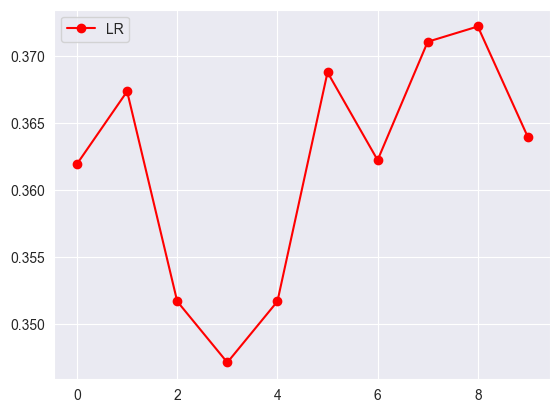

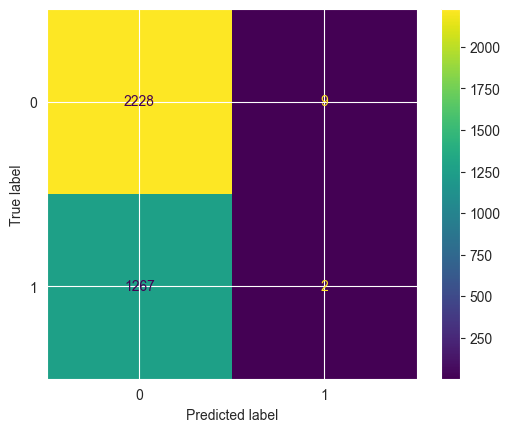

In [36]:

LRclass = LogisticRegression()
# Split into features (predictors) and target/label
#using PANDAS

heart_feat = heart.iloc[:, 0:10]  #split into features, the things we want to input

heart_targ = heart.iloc[:, 10]  # split into target, this is the thing we are looking to check given all inputs
#train test split
heartTrainX, heartTestX, heartTrainY, heartTestY = train_test_split(heart_feat, heart_targ, test_size=0.4)

#fit training data. Train models on training data


LRclass.fit(heartTrainX, heartTrainY)

# Carry out predictions on test dataset


LRpredHeart = LRclass.predict(heartTestX)

# Error metrics using roc_auc score
print("LR classifier roc_auc score:", roc_auc_score(heartTestY, LRpredHeart))

# Error Metrics using accuracy score


print("LR classifier accuracy score:", accuracy_score(heartTestY, LRpredHeart))

# Error Metrics using Mean Square Error

print("LR MSE:", mean_squared_error(heartTestY, LRpredHeart))
#K-Fold Cross validation
print("MSE of LR model using k-fold CV:",
      -cross_val_score(LRclass, heart_feat, heart_targ.ravel(), cv=5, scoring="neg_mean_squared_error").mean())

#Evaluation of models
LRTT = []
for i in range(10):
    #train test split
    heartTrainX, heartTestX, heartTrainY, heartTestY = train_test_split(heart_feat, heart_targ, test_size=0.4)

    #fit training data. Train models on training data
    LRclass.fit(heartTrainX, heartTrainY)

    # Carry out predictions on test dataset
    LRpredHeart = LRclass.predict(heartTestX)

    LRTT.append(mean_squared_error(LRpredHeart, heartTestY))

plt.plot(LRTT, "-ro", label="LR")
plt.legend(loc="best")
for mean in LRTT:
    print(mean)
#Tune LR model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

#create the grid of hyperparameters to be used in RandomizedSearchCV
random_grid_LR = {'penalty': ['l2', None], 'solver': ['sag', 'saga', 'liblinear']}
#Create the randomizedSearchCV object
LR_random = RandomizedSearchCV(estimator=LRclass, param_distributions=random_grid_LR, n_iter=30, cv=5, verbose=0,
                               n_jobs=-1, scoring="neg_mean_squared_error")

LR_random.fit(heart_feat, heart_targ)
LR_random.fit(heart_feat, heart_targ)
# Run LR Model with optimized hyperparameters
random = []
for i in range(20):
    random.append(-cross_val_score(LogisticRegression(solver='sag', penalty='l2'), X=heart_feat, y=heart_targ, cv=5,
                                   scoring="neg_mean_squared_error").mean())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

LRclass.fit(heartTrainX, heartTrainY)

predictions = LRclass.predict(heartTestX)
cm = confusion_matrix(heartTestY, predictions, labels=LRclass.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LRclass.classes_)
disp.plot()

print(accuracy_score(heartTestY, predictions))


In [37]:
#Reduction of features did not improve accuracy, as hypothesized due to the disadvantage of Logistical Regression models being that they suffer from a high feature/record ratio